In [2]:
import numpy as np
import matplotlib.pyplot as plt



Part a

Step 10, dt=2.56e-05, Error Estimate=1.1029074834040369e-25
Step 20, dt=0.0262144, Error Estimate=5.78141719324102e-13
Step 30, dt=0.04287727662298124, Error Estimate=4.180628520254776e-09
Step 40, dt=0.011501474249141663, Error Estimate=1.121379110738648e-09
Step 50, dt=0.003345352458992086, Error Estimate=3.2724062440595295e-10
Step 60, dt=0.001067942632376079, Error Estimate=1.0481268183863187e-10
Step 70, dt=0.00037187526894870676, Error Estimate=3.6599954306727264e-11
Step 80, dt=0.00013987874594487853, Error Estimate=1.379829791461134e-11
Step 90, dt=5.629837925989276e-05, Error Estimate=5.563809832353518e-12
Step 100, dt=2.404496903520068e-05, Error Estimate=2.3798791761801384e-12
Step 110, dt=1.0821103999928912e-05, Error Estimate=1.0723601782390099e-12
Step 120, dt=5.100947038782391e-06, Error Estimate=5.060197075757827e-13
Step 130, dt=2.505965444192887e-06, Error Estimate=2.4880971286172477e-13
Step 140, dt=1.2775759865554694e-06, Error Estimate=1.269396037692241e-13
Step 15

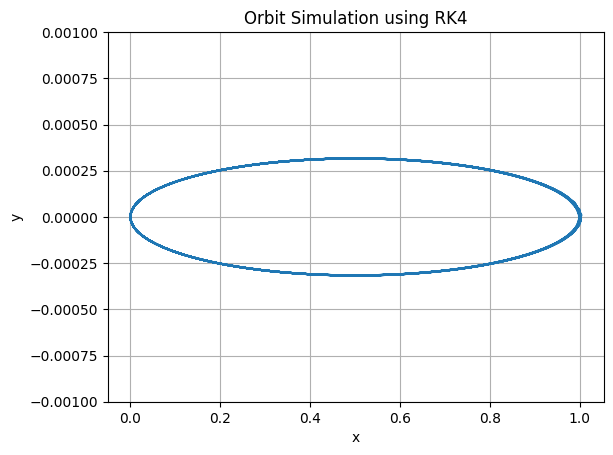

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 4.47213595e-11 0.00000000e+00]
 [1.00000000e+00 1.34164079e-10 0.00000000e+00]
 ...
 [3.64751499e-04 1.20783767e-05 0.00000000e+00]
 [3.52385469e-04 1.18719975e-05 0.00000000e+00]
 [3.40489130e-04 1.16700082e-05 0.00000000e+00]]


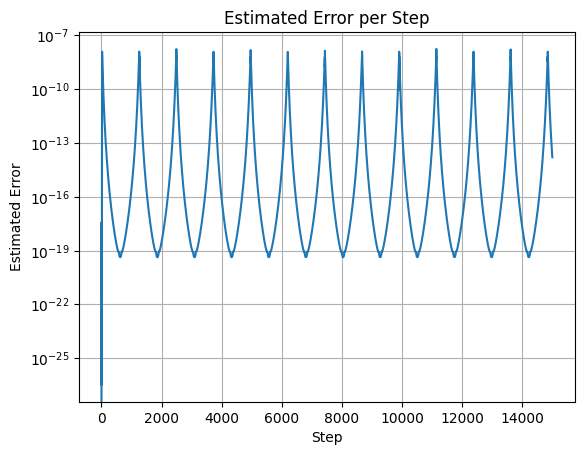

9.999999508613071e-08


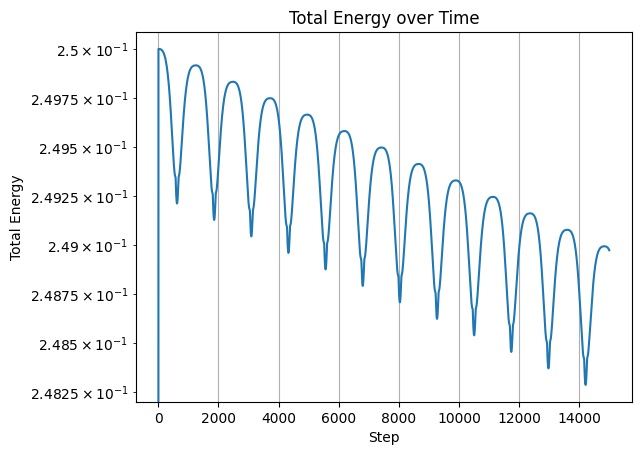

In [187]:
v_0 = np.sqrt(5) * 1e-4

def acceleration(r,):
    norm = np.linalg.norm(r)
    if norm < 1e-10:  # Add a small threshold to prevent division by zero
        return np.zeros_like(r)
    return -1/norm**3 * np.array(r) / 4
def vel_dispersion(v, A=1, B=1):
    return -A/(np.linalg.norm(v)**3 + B) * np.array(v)

def rk4_step(r, v, dt, alpha_dispersion=0, A=1, B=1):
    k1_v = acceleration(r) + alpha_dispersion * vel_dispersion(v, A, B)
    k1_r = v

    k2_v = acceleration(r + 0.5 * dt * k1_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k1_v, A, B)
    k2_r = v + 0.5 * dt * k1_v

    k3_v = acceleration(r + 0.5 * dt * k2_r) + alpha_dispersion * vel_dispersion(v + 0.5 * dt * k2_v, A, B)
    k3_r = v + 0.5 * dt * k2_v

    k4_v = acceleration(r + dt * k3_r) + alpha_dispersion * vel_dispersion(v + dt * k3_v, A, B)
    k4_r = v + dt * k3_v

    r_next = r + (dt / 6) * (k1_r + 2 * k2_r + 2 * k3_r + k4_r)
    v_next = v + (dt / 6) * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)

    return r_next, v_next
def simulate_orbit(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0

    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion)
        norm = np.linalg.norm(r2-r1)
        if norm == 0:  # Add a small threshold to prevent division by zero
            norm = 1e-25
        rho = 30 * dt * tol / norm
        if rho >= 1:
            r[i] = r1
            v[i] = v1
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)

    return r, v, err, energy

r, v, err, energy = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-7, 3e-3, alpha_dispersion=0)
plt.plot(r[:, 0], r[:, 1])
plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
# plt.axis('equal')
plt.grid()
plt.show()
print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()




Step 10, dt=0.07337965408368037, Error Estimate=7.221320976382944e-09
Step 20, dt=0.10994410943559904, Error Estimate=4.360676776199597e-09
Step 30, dt=0.03287117591495964, Error Estimate=3.2276317384103953e-09
Step 40, dt=0.009919891654814121, Error Estimate=9.718610450880217e-10
Step 50, dt=0.0030649437450066025, Error Estimate=3.0032402551237996e-10
Step 60, dt=0.0010038421853639813, Error Estimate=9.86010693143219e-11
Step 70, dt=0.0003547800820412269, Error Estimate=3.493395410163042e-11
Step 80, dt=0.00013495924652153087, Error Estimate=1.3317788487794845e-11
Step 90, dt=5.492639105153533e-05, Error Estimate=5.430126963448482e-12
Step 100, dt=2.377715311580588e-05, Error Estimate=2.3543405616491577e-12
Step 110, dt=1.0898190544048438e-05, Error Estimate=1.0805721456614334e-12
Step 120, dt=5.27400919340098e-06, Error Estimate=5.235607683842364e-13
Step 130, dt=2.693263392062615e-06, Error Estimate=2.676673339192393e-13
Step 140, dt=1.455333129420045e-06, Error Estimate=1.447978363

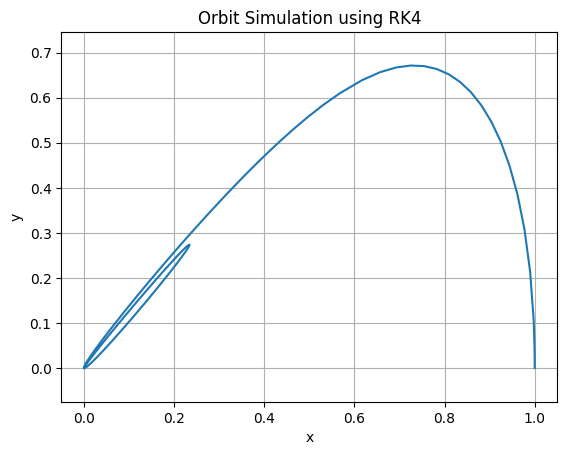

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.99950224e-01  1.58939102e-02  0.00000000e+00]
 [ 9.99556196e-01  4.70405791e-02  0.00000000e+00]
 ...
 [-9.84689437e-05  9.70700763e-06  0.00000000e+00]
 [-9.61215361e-05  4.16779563e-06  0.00000000e+00]
 [-9.35959532e-05 -1.35334248e-06  0.00000000e+00]]


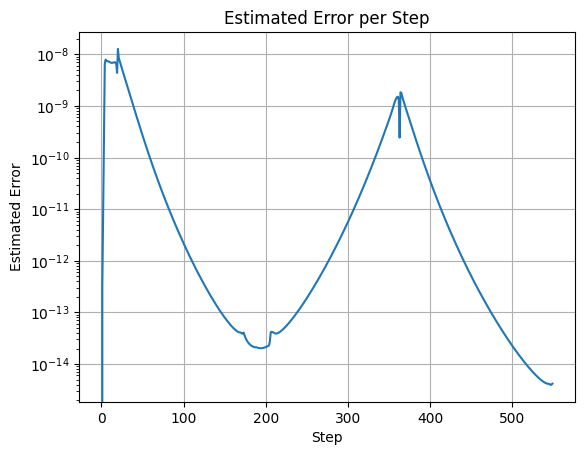

9.360573697401561e-05


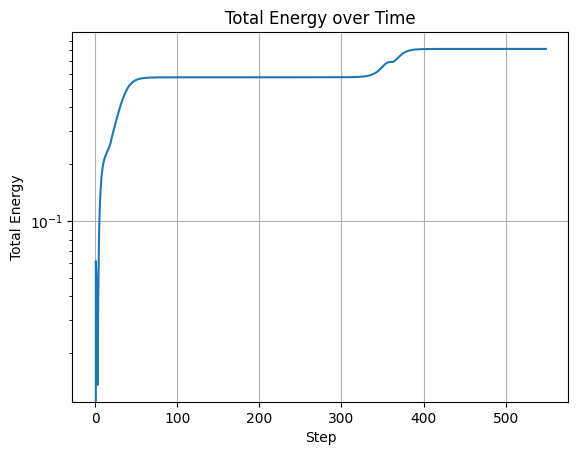

In [185]:
v_0 = .8
r, v, err, energy = simulate_orbit(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-2, 11, alpha_dispersion=1)
plt.plot(r[:, 0], r[:, 1])
# plt.ylim(-1e-3, 1e-3)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Simulation using RK4')
plt.axis('equal')
plt.grid()
plt.show()

print(r)


plt.plot(err)
plt.yscale('log')   
plt.xlabel('Step')
plt.ylabel('Estimated Error')
plt.title('Estimated Error per Step')
plt.grid()
plt.show()

print(min([np.linalg.norm(r[i,:]) for i in range(r.shape[0])]))

plt.plot(abs(energy))
plt.yscale('log')
plt.xlabel('Step')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time')
plt.grid()
plt.show()

In [190]:
def time_to_schwarzschild(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0):
    num_steps = int(tf / dt)
    r = np.zeros((num_steps//2, 3))
    v = np.zeros((num_steps//2, 3))
    err = np.zeros(num_steps//2)
    energy = np.zeros(num_steps//2)
    r[0] = r0
    v[0] = v0

    t = 0
    i = 1
    while i < num_steps//2:
        r1, v1 = rk4_step(r[i-1], v[i-1], dt, alpha_dispersion)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion)
        r2, v2 = rk4_step(r[i-1], v[i-1], 2*dt, alpha_dispersion)
        norm = np.linalg.norm(r2-r1)
        if norm == 0:  # Add a small threshold to prevent division by zero
            norm = 1e-25
        rho = 30 * dt * tol / norm
        if rho >= 1:
            t += 2 * dt
            r[i] = r1
            v[i] = v1
            err[i] = norm/30
            energy[i] = 0.5 * np.linalg.norm(v[i])**2 - 1/(4 * np.linalg.norm(r[i]))
            i += 1
            if i % 10 == 0:
                print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)

        if np.linalg.norm(r[i-1]) < 1e-7:
            return t


print(time_to_schwarzschild(np.array([1, 0, 0]), np.array([0, v_0, 0]), 1e-2, 1e3, alpha_dispersion=1))

Step 10, dt=0.09654356232726811, Error Estimate=5.3514760801601795e-09
Step 20, dt=0.03318638575726758, Error Estimate=3.258530991147636e-09
Step 30, dt=0.010005351753015328, Error Estimate=9.802161395916713e-10
Step 40, dt=0.0030877779896786063, Error Estimate=3.025429662767081e-10
Step 50, dt=0.0010093568937990709, Error Estimate=9.913441047421767e-11
Step 60, dt=0.0003557152686940362, Error Estimate=3.502200498373824e-11
Step 70, dt=0.0001347338449798116, Error Estimate=1.3293383530924364e-11
Step 80, dt=5.447112790805295e-05, Error Estimate=5.383864903707869e-12
Step 90, dt=2.3338002792277097e-05, Error Estimate=2.3100865740722228e-12
Step 100, dt=1.0527969674611781e-05, Error Estimate=1.0433684610676571e-12
Step 110, dt=4.972180867742206e-06, Error Estimate=4.932663217686455e-13
Step 120, dt=2.4465404420929464e-06, Error Estimate=2.429173817978289e-13
Step 130, dt=1.2489453086638585e-06, Error Estimate=1.2409807093890543e-13
Step 140, dt=6.591082354862365e-07, Error Estimate=6.553

In [210]:
import concurrent.futures
def time_to_schwarzschild(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A=1, B=1):
    num_steps = int(tf / dt)
    r = r0
    v = v0

    t = 0
    max_iter = int(tf / dt) # A reasonable safety guard, 2x the naive step count
    i = 1
    while _ in range(max_iter//2):
        r1, v1 = rk4_step(r, v, dt, alpha_dispersion, A, B)
        r1, v1 = rk4_step(r1, v1, dt, alpha_dispersion, A, B)
        r2, v2 = rk4_step(r, v, 2*dt, alpha_dispersion, A, B)
        norm = np.linalg.norm(r2-r1)
        if norm == 0:  # Add a small threshold to prevent division by zero
            norm = 1e-25
        rho = 30 * dt * tol / norm
        if rho >= 1:
            t += 2 * dt
            r = r1
            v = v1
            # if i % 10 == 0:
                # print(f"Step {i}, dt={dt}, Error Estimate={err[i-1]}")

        dt = min(dt * rho**(1/4), 2 * dt)

        if np.linalg.norm(r[i-1]) < 1e-7:
            return t
        
    return tf  # Return maximum time if Schwarzschild radius not reached
        
def process_combination_worker(params, r0, v0, dt, tf, tol, alpha_dispersion, A_values, B_values):
    """
    This is the new top-level worker function. 
    It can be pickled and sent to other processes.
    """
    i, j = params
    # Call the original simulation function with the correct A and B
    return (i, j, time_to_schwarzschild(r0, v0, dt, tf, tol, alpha_dispersion, 
                                      A_values[i], B_values[j]))

# -----------------------------------------------------------------
# ^^^^ --- THIS IS THE FIX --- ^^^^
# -----------------------------------------------------------------


def A_B_sweep(r0, v0, dt, tf, tol=1e-7, alpha_dispersion=0, A_values=[1], B_values=[1]):
    results = np.zeros((len(A_values), len(B_values)))
    parameter_combinations = [(i, j) for i in range(len(A_values)) for j in range(len(B_values))]
    
    # --- REMOVED ---
    # def process_combination(params):
    #     ...
    # ---
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        # Submit the *global* worker function
        # Pass the changing 'params' (i, j)
        # Pass all the *constant* arguments that the worker needs
        futures = [executor.submit(process_combination_worker, 
                                    params,                   # The (i, j) tuple
                                    r0, v0, dt, tf, tol,      # All the constant args
                                    alpha_dispersion, 
                                    A_values, B_values) 
                   for params in parameter_combinations]
        
        for future in concurrent.futures.as_completed(futures):
            i, j, result = future.result()
            results[i, j] = result
            
    return results

if __name__ == "__main__":
    # Generate 2D heatmap of time to schwarzschild vs A and B
    A_values = np.linspace(0.5, 10, 20)  # Increased resolution
    B_values = np.linspace(0.5, 10, 20)   # Adjusted range and increased resolution

    print("Starting parameter sweep...")
    results = A_B_sweep(np.array([1, 0, 0]), np.array([0, v_0, 0]), 
                    dt=1e-2, tf=1e2, alpha_dispersion=1, 
                    A_values=A_values, B_values=B_values)
    print("Parameter sweep complete!")

    # Create the heatmap with improved visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(results, extent=(np.log10(B_values[0]), np.log10(B_values[-1]), 
                            A_values[0], A_values[-1]), 
            aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Time to Schwarzschild Radius (s)')
    plt.xlabel('log₁₀(B)')
    plt.ylabel('A')
    plt.title('Time to Reach Schwarzschild Radius')

    # Add grid lines
    plt.grid(True, which='both', color='white', linestyle='-', alpha=0.2)
    plt.show()

    # Print some statistics
    print(f"Minimum time: {np.min(results):.2f} s")
    print(f"Maximum time: {np.max(results):.2f} s")
    print(f"Mean time: {np.mean(results):.2f} s")

Starting parameter sweep...


Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\queues.py", line 246, in _feed
    send_bytes(obj)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\queues.py", line 246, in _feed
    send_bytes(obj)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\connection.py", line 184, in se

OSError: handle is closed